<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/GroupExercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members**

**1.POOJASHREE SHIVARAJA**

**2.SAMI HAMROUNI**

# **1.Load the Dataset**

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhatvikas/movielens-100k-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/bhatvikas/movielens-100k-dataset/versions/1


# **2. Check Data Types**

In [10]:
import pandas as pd


file_path = path + '/ml-100k/u.data'

try:
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(file_path, sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

    # Check the data types of each column
    print("data types")
    print(df.dtypes)
    print("data head")
    print(df.head())
    print("data info")
    print(df.info())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please verify the path.")
except Exception as e:
    print(f"An error occurred: {e}")


data types
user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object
data head
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


# **3. Check for Missing Values**

In [12]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("bhatvikas/movielens-100k-dataset")

print("Path to dataset files:", path)
# # **2. Check Data Types**


file_path = path + '/ml-100k/u.data'

try:

    # Check for Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please verify the path.")
except Exception as e:
    print(f"An error occurred: {e}")


Path to dataset files: /root/.cache/kagglehub/datasets/bhatvikas/movielens-100k-dataset/versions/1

Missing Values:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


# 4. Check for Duplicates

In [13]:
import kagglehub
import pandas as pd


# # 4. Check for Duplicates

try:
    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicate_rows)

    # Check for duplicates based on specific columns (e.g., 'user_id', 'item_id')
    duplicate_rows_specific_cols = df[df.duplicated(subset=['user_id', 'item_id'])]
    print("\nDuplicate Rows based on 'user_id' and 'item_id':")
    print(duplicate_rows_specific_cols)

    # Number of duplicate rows
    num_duplicates = len(duplicate_rows)
    print(f"\nNumber of duplicate rows: {num_duplicates}")

except NameError:
    print("DataFrame 'df' not found. Please make sure the file is loaded correctly.")
except Exception as e:
    print(f"An error occurred: {e}")



Duplicate Rows:
Empty DataFrame
Columns: [user_id, item_id, rating, timestamp]
Index: []

Duplicate Rows based on 'user_id' and 'item_id':
Empty DataFrame
Columns: [user_id, item_id, rating, timestamp]
Index: []

Number of duplicate rows: 0


# **5. Analyze Cardinality**

In [16]:
try:
    # Analyze Cardinality
    print("\nCardinality Analysis:")
    for col in df.columns:
        cardinality = df[col].nunique()
        print(f"Cardinality of '{col}': {cardinality}")
except NameError:
    print("DataFrame 'df' not found. Please make sure the file is loaded correctly.")
except Exception as e:
    print(f"An error occurred: {e}")



Cardinality Analysis:
Cardinality of 'user_id': 943
Cardinality of 'item_id': 1682
Cardinality of 'rating': 5
Cardinality of 'timestamp': 49282


# **6. Analyze Value Distributions**


Summary Statistics for Ratings:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


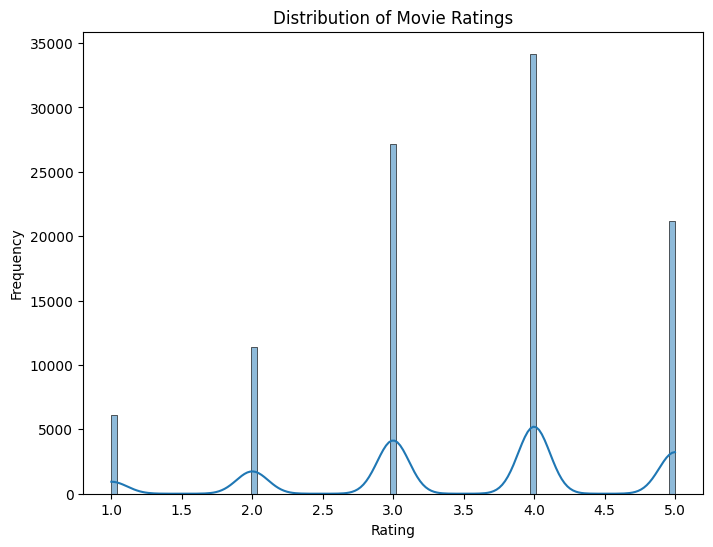

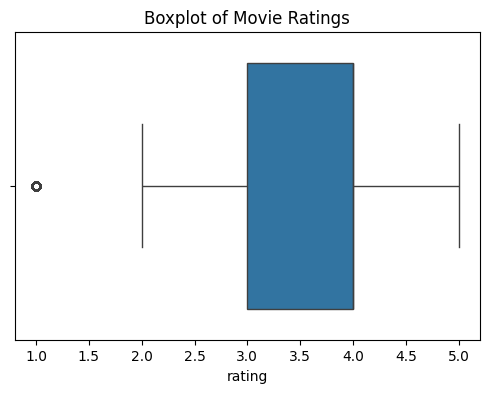

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Summary statistics for ratings
    print("\nSummary Statistics for Ratings:")
    print(df['rating'].describe())

    # Visualize rating distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['rating'], kde=True)
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot of ratings
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['rating'])
    plt.title('Boxplot of Movie Ratings')
    plt.show()

except NameError:
    print("DataFrame 'df' not found. Please make sure the file is loaded correctly.")
except Exception as e:
    print(f"An error occurred: {e}")


# 7. check Functional Dependencies

In [18]:

import pandas as pd


try:
    functional_dependency_holds = df.groupby('item_id')['rating'].nunique().apply(lambda x: x == 1).all()

    if functional_dependency_holds:
        print("Movie ID functionally determines Rating.")
    else:
        print("Movie ID does NOT functionally determine Rating.")

except KeyError:
    print("Error: 'item_id' or 'rating' column not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")


Movie ID does NOT functionally determine Rating.
